### FINAL PROJECT - Random Forest and Support Vector Machine Linear Classifier....... 

In [86]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as pltt
from sklearn import tree
import os

In [87]:
data = pd.read_csv('./Data/Speed_Dating_Data.csv', encoding='latin-1', engine="python")
# What kind of data are we dealing with?
data.dtypes.value_counts()

float64    174
int64       13
object       8
dtype: int64

In [88]:
# Men (1) and women (0)
data.groupby('iid').mean().gender.value_counts()

1.0    277
0.0    274
Name: gender, dtype: int64

In [90]:
# What percentage of pairs resulted in a match?
data['match'].value_counts(normalize=True)

0    0.835283
1    0.164717
Name: match, dtype: float64

In [91]:
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [92]:
data.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [93]:
info = ['iid','attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','like_o','race','pid','dec_o',
        'gender','age', 'pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha','go_out',
        'sports', 'tvsports', 'exercise', 'dining', 'museums',
 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
 'movies', 'concerts', 'music', 'shopping', 'yoga','match']
df = data[info]

In [94]:
df.fillna(0)
df = df[np.isfinite(df).all(1)]

In [95]:
data.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [96]:
df.dropna()

,iid,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,race,pid,...,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,match
0,1,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,11.0,...,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0
1,1,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,12.0,...,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0
2,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,4.0,13.0,...,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,1
3,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,4.0,14.0,...,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,1
4,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,4.0,15.0,...,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,1
5,1,7.0,7.0,8.0,8.0,7.0,7.0,7.0,4.0,16.0,...,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0
6,1,3.0,6.0,7.0,5.0,8.0,7.0,2.0,4.0,17.0,...,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0
7,1,6.0,7.0,5.0,6.0,8.0,6.0,7.0,4.0,18.0,...,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0
8,1,7.0,7.0,8.0,8.0,8.0,9.0,6.5,4.0,19.0,...,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,1
9,1,6.0,6.0,6.0,6.0,6.0,6.0,6.0,4.0,20.0,...,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0


In [97]:
X = df[['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','like_o','race','dec_o','gender','age', 'pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha','go_out', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
 'movies', 'concerts', 'music', 'shopping', 'yoga']]
y = df['dec_o'].values.reshape(-1, 1)
print(X.shape, y.shape)

(6815, 35) (6815, 1)


In [98]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,race,dec_o,gender,...,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
3086,7.0,10.0,10.0,7.0,10.0,5.0,8.0,2.0,1,1,...,1.0,2.0,10.0,4.0,8.0,6.0,10.0,10.0,1.0,7.0
4422,6.0,7.0,6.0,7.0,6.0,6.0,6.0,1.0,0,1,...,7.0,9.0,7.0,4.0,7.0,9.0,5.0,10.0,1.0,1.0
3399,6.0,8.0,7.0,7.0,9.0,8.0,8.0,4.0,0,1,...,9.0,8.0,5.0,10.0,8.0,10.0,10.0,10.0,8.0,6.0
6864,8.0,8.0,9.0,8.0,9.0,5.0,8.0,4.0,1,1,...,5.0,9.0,3.0,4.0,6.0,7.0,7.0,7.0,2.0,1.0
7423,6.0,8.0,7.0,6.0,7.0,5.0,7.0,4.0,0,0,...,3.0,4.0,6.0,4.0,4.0,8.0,5.0,7.0,7.0,7.0


In [99]:
#int(y_train)
y_train=y_train.astype('int32')

In [100]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,race,dec_o,gender,...,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
3086,7.0,10.0,10.0,7.0,10.0,5.0,8.0,2.0,1,1,...,1.0,2.0,10.0,4.0,8.0,6.0,10.0,10.0,1.0,7.0
4422,6.0,7.0,6.0,7.0,6.0,6.0,6.0,1.0,0,1,...,7.0,9.0,7.0,4.0,7.0,9.0,5.0,10.0,1.0,1.0
3399,6.0,8.0,7.0,7.0,9.0,8.0,8.0,4.0,0,1,...,9.0,8.0,5.0,10.0,8.0,10.0,10.0,10.0,8.0,6.0
6864,8.0,8.0,9.0,8.0,9.0,5.0,8.0,4.0,1,1,...,5.0,9.0,3.0,4.0,6.0,7.0,7.0,7.0,2.0,1.0
7423,6.0,8.0,7.0,6.0,7.0,5.0,7.0,4.0,0,0,...,3.0,4.0,6.0,4.0,4.0,8.0,5.0,7.0,7.0,7.0


In [101]:
#int(y_train)
y_train=y_train.astype('int32')
y=y.astype('int32')

In [84]:
!pip install rfpimp
from rfpimp import *
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.20)

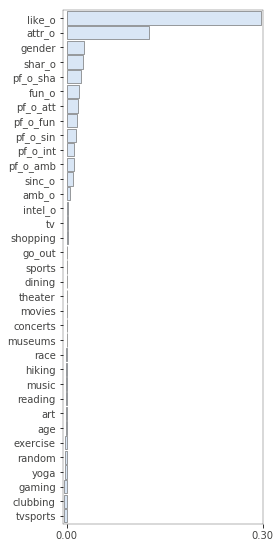

ValueError: Unknown label type: 'continuous'

In [85]:
features = ['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','like_o','race','dec_o','gender','age', 'pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha','go_out', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
 'movies', 'concerts', 'music', 'shopping', 'yoga']


df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop('dec_o',axis=1), df_train['dec_o']
X_test, y_test = df_test.drop('dec_o',axis=1), df_test['dec_o']
X_train['random'] = np.random.random(size=len(X_train))
X_test['random'] = np.random.random(size=len(X_test))

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

imp = importances(rf, X_test, y_test) # permutation
viz = plot_importances(imp)
viz.view()


df_train, df_test = train_test_split(df, test_size=0.20)
features = ['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','like_o','race','gender','age', 'pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha','go_out', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
 'movies', 'concerts', 'music', 'shopping', 'yoga']
df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop('like_o',axis=1), df_train['like_o']
X_test, y_test = df_test.drop('like_o',axis=1), df_test['like_o']
# Add column of random numbers
X_train['random'] = np.random.random(size=len(X_train))
X_test['random'] = np.random.random(size=len(X_test))

rf = RandomForestClassifier(n_estimators=100,
                            min_samples_leaf=5,
                            n_jobs=-1,
                            oob_score=True)
rf.fit(X_train, y_train)

imp = importances(rf, X_test, y_test, n_samples=-1)
viz = plot_importances(imp)
viz.view()

### SVM

In [102]:
df1=pd.read_csv("./Data/datas2.csv", encoding ="utf8", engine="python")

In [103]:
df1.rename(columns={'iid':'Wave_ID',
                   'id': 'Subject_Number',
                   'gender': 'Gender',
                  'attr_o':'Rating_Partner',
                  'sinc_o': "Sincere", 
                    'intel_o': "Intelligence", 
                   'fun_o':"Fun_Loving", 
                   'amb_o': "Ambitious",
                   'shar_o': "Sharing",
                   'like_o': "Likeability", 
                   'age': "Age", 
                   'race': "Race"}, inplace=True)

In [104]:
target1 = df1["Rating_Partner"]
target_names1 =['Gender', 'Rating_Part', 'Sincere','Intelligence', 'Fun_Loving','Ambitious','Sharing','Likeability','Age','Race']

In [105]:
data1 = df1.drop("Rating_Partner", axis=1)
feature_names1=data.columns
#data.head()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1,target1,random_state=42)

In [109]:
#int(y_train)
y_train=y_train.astype('int32')

In [110]:
# Support Vector Machine Linear Classifier
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [112]:
#model accuracy
print('Test Acc: %.3f' %model.score(X_test,y_test))

Test Acc: 0.329


In [115]:
#Classification Report
from sklearn.metrics import classification_report
predictions=model.predict(X_test)
print(classification_report(y_test, predictions, target_names=target_names1))

              precision    recall  f1-score   support

      Gender       0.38      0.44      0.41        25
 Rating_Part       0.00      0.00      0.00        54
     Sincere       0.00      0.00      0.00        81
Intelligence       0.15      0.02      0.04       141
  Fun_Loving       0.25      0.40      0.31       273
   Ambitious       0.39      0.45      0.42       380
     Sharing       0.32      0.37      0.34       332
 Likeability       0.31      0.44      0.36       255
         Age       0.00      0.00      0.00       120
        Race       0.60      0.58      0.59        73

    accuracy                           0.33      1734
   macro avg       0.24      0.27      0.25      1734
weighted avg       0.27      0.33      0.29      1734



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
